# GRU

```{note}
当我们在RNN中计算梯度时，矩阵连续乘积会导致梯度消失或梯度爆炸。<br/>
也就是说RNN面临着长期依赖的问题，即随着输入序列长度的增加，网络无法学习和利用序列中较久之前的信息。<br/>
门控循环单元（Gated Recurrent Unit，GRU）可以通过门控较好地解决这个问题。
```

## 模型

GRU中有两个门控单元，重置门  $\mathbf{R}_{t}\in\mathbb{R}^{n\times{h}}$  和更新门  $\mathbf{Z}_{t}\in\mathbb{R}^{n\times{h}}$，它们的计算公式类似:

$$\mathbf{R}_{t} = \sigma(\mathbf{X}_{t}\mathbf{W}_{xr} + \mathbf{H}_{t-1}\mathbf{W}_{hr} + \mathbf{b}_{r})$$

$$\mathbf{Z}_{t} = \sigma(\mathbf{X}_{t}\mathbf{W}_{xz} + \mathbf{H}_{t-1}\mathbf{W}_{hz} + \mathbf{b}_{z})$$

重置门决定 $\mathbf{H}_{t-1}$ 在计算 $\tilde{\mathbf{H}}_{t}$ 时是否被忽略，有助于捕捉序列中的短期依赖关系：

$$\tilde{\mathbf{H}}_{t} = \mbox{tanh}(\mathbf{X}_{t}\mathbf{W}_{xh} + (\mathbf{R}_{t} \odot \mathbf{H}_{t-1})\mathbf{W}_{hh} + \mathbf{b}_{h})$$


更新门控制着 $\mathbf{H}_{t}$ 是否需要被 $\tilde{\mathbf{H}}_{t}$ 所更新，有助于捕捉序列中的长期依赖关系：

$$\mathbf{H}_{t} = \mathbf{Z}_{t} \odot \mathbf{H}_{t-1} + (1 - \mathbf{Z}_{t}) \odot \tilde{\mathbf{H}}_{t}$$

可以看出，相比于普通的RNN，GRU有着额外的途径保留之前的信息。

![jupyter](../images/8/gru-3.svg)

## 训练

In [1]:
from torch import nn
import d2l

# 载入数据
batch_size, num_steps = 32, 40
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

In [2]:
# 建立模型，模型的基础结构是GRU
num_hiddens = 128
gru_layer = nn.GRU(len(vocab), num_hiddens)
net = d2l.RNNModel(gru_layer, vocab_size=len(vocab))

time traveller and the seat the seat the seat the seat the seat 


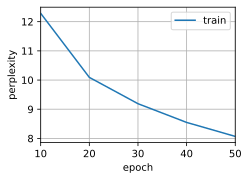

In [3]:
# 训练
num_epochs, lr = 50, 0.1
d2l.train_language_model(net, train_iter, vocab, lr, num_epochs)